##Verschil populatie- en steekproefvariantie

In [1]:
## load referenced libraries:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
from matplotlib import gridspec
from collections import defaultdict
from IPython.display import display, Math, Latex, Pretty

colormap = ['#ee1c24', '#f26522', '#f8941d', '#fff200', '#8dc73f', '#39b54a', '#00a651', '#00a99d', '#00aef0']

<IPython.core.display.Latex object>

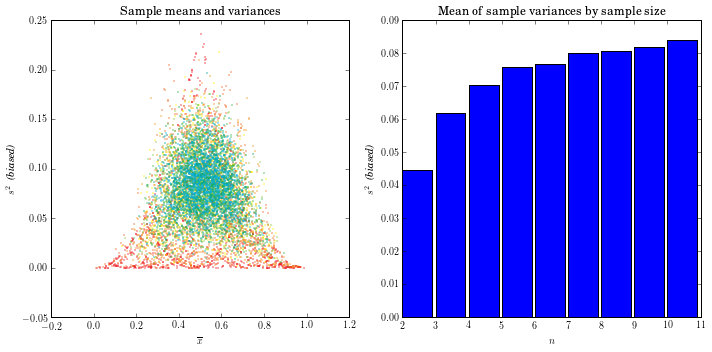

In [9]:
## create random population:
pop_size = 100
population = np.random.rand(pop_size)
pop_mean, pop_var = population.mean(), population.var()
display(Latex(r"""
Population characteristics (drawn from uniform random 0 <= x < 1)
$$\begin{{align}}
N &= {} \\
\mu &= {} \\
\sigma^2 &= {}
\end{{align}}$$""".format(pop_size, pop_mean, pop_var)))

## draw 1000 samples for each sample size [2..10]
## and calculate the mean and (biased) variance for each sample
sample_means = defaultdict(list)
sample_vars_biased = defaultdict(list)
for _ in range(1000):
    for sample_size in range(2, 11):
        sample = np.random.choice(population, sample_size)
        sample_means[sample_size].append(sample.mean())
        sample_vars_biased[sample_size].append(sample.var(ddof=0))

## draw two plots
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
## left plot: sample mean against (biased) variance
##            for all samples for each sample size
## warmer color indicates smaller sample size 
plt.subplot(gs[0])
plt.title("Sample means and variances")
for i, sample_size in enumerate(sorted(sample_means.keys())):
    plt.scatter(
        sample_means[sample_size],
        sample_vars_biased[sample_size],
        s=1,
        color=colormap[i],
        alpha=0.4
    )
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r"\overline{x}")
plt.ylabel(r"$s^2$ \textit{ (biased)}")
## right plot: histogram of mean variance per sample size
plt.subplot(gs[1])
plt.title("Mean of sample variances by sample size")
plt.bar(
    sorted(sample_vars_biased.keys()),
    [np.mean(v) for (k, v) in sorted(sample_vars_biased.items())],
    width=0.9
)
plt.xlabel(r"$n$")
plt.ylabel(r"$s^2$ \textit{ (biased)}")
fig.tight_layout()
plt.show()